In [ ]:
import tensorflow as tf
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from functools import partial

In [ ]:
df = pd.read_csv(Path("/content/ChipotleFiveYears.csv"))

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,610.099976,613.700012,604.789978,611.630005,611.630005,501900
1,2019-03-04,612.400024,622.489990,612.229980,618.849976,618.849976,727500
2,2019-03-05,618.479980,622.000000,613.479980,616.010010,616.010010,341300
3,2019-03-06,616.010010,619.210022,611.080017,613.409973,613.409973,272800
4,2019-03-07,614.419983,614.869995,607.130005,609.530029,609.530029,434400


In [ ]:
columns_to_keep = ['Close', 'Open', 'High', 'Low']
df = df[columns_to_keep]

In [ ]:
#95% training 5% validation
train = df[:1197]

valid = df[1198:]

In [ ]:
seq_length = 15
train_ds = tf.keras.utils.timeseries_dataset_from_array(
  train.to_numpy(),
  targets=train['Close'],
  sequence_length=seq_length,
  batch_size=8,
  shuffle=True,
  seed=42
)

valid_ds = tf.keras.utils.timeseries_dataset_from_array(
  valid.to_numpy(),
  targets=valid['Close'],
  sequence_length=seq_length,
  batch_size=8
)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.BatchNormalization(input_shape=[None, 4]),
  tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=[None, 4], activation='relu'),
  tf.keras.layers.SimpleRNN(64, return_sequences=True),
  tf.keras.layers.SimpleRNN(64),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',  metrics=['mean_squared_error'])
history = model.fit(train_ds, validation_data=valid_ds, epochs=10)

Epoch 1/10
148/148 [==============================] - 8s 27ms/step - loss: 2012195.0000 - mean_squared_error: 2012195.0000 - val_loss: 5421689.5000 - val_mean_squared_error: 5421689.5000
Epoch 2/10
148/148 [==============================] - 3s 19ms/step - loss: 2012162.0000 - mean_squared_error: 2012162.0000 - val_loss: 5421687.5000 - val_mean_squared_error: 5421687.5000
Epoch 3/10
148/148 [==============================] - 3s 19ms/step - loss: 2012161.5000 - mean_squared_error: 2012161.5000 - val_loss: 5421687.5000 - val_mean_squared_error: 5421687.5000
Epoch 4/10
148/148 [==============================] - 2s 14ms/step - loss: 2012162.1250 - mean_squared_error: 2012162.1250 - val_loss: 5421686.5000 - val_mean_squared_error: 5421686.5000
Epoch 5/10
148/148 [==============================] - 2s 16ms/step - loss: 2012162.3750 - mean_squared_error: 2012162.3750 - val_loss: 5421686.5000 - val_mean_squared_error: 5421686.5000
Epoch 6/10
148/148 [==============================] - 3s 19ms/ste

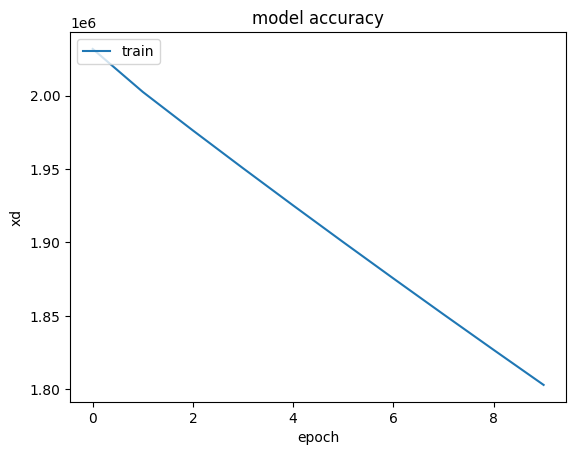

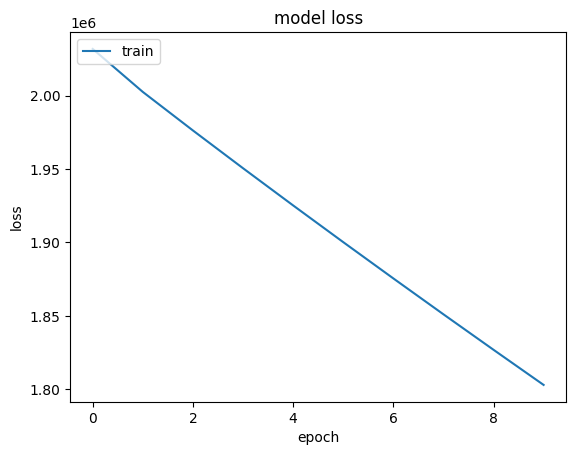

In [ ]:
#accuracy history
plt.plot(history.history['mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('xd')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
#loss history
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()